In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure',autolayout = True)
plt.rc('axes',labelweight='bold',labelsize='large', titleweight='bold',titlesize = 18,titlepad=10)
plt.rc('image',cmap='magma')
tf.config.run_functions_eagerly(True)

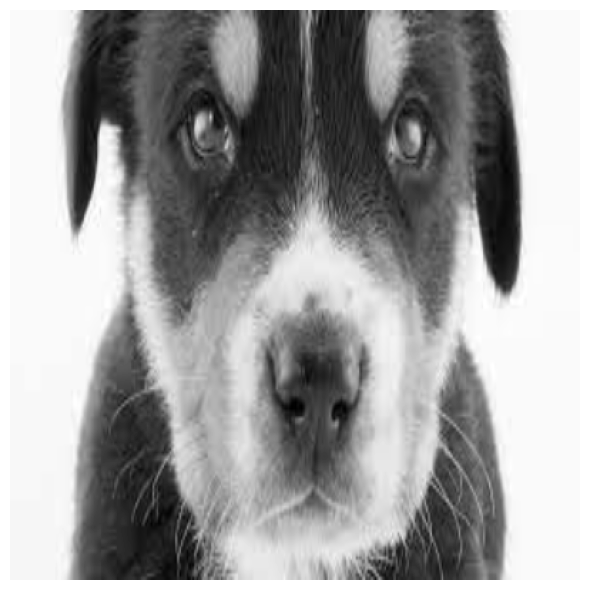

In [6]:
image_path = 'sample_data/Doggie.jpeg'
image = tf.io.read_file(image_path)
image.get_shape().as_list() # []
image = tf.io.decode_jpeg(image,channels= 1)
image.get_shape().as_list()
image = tf.image.resize(image, size=[400, 400])
image.get_shape().as_list()

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6,6))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [21]:
kernel = tf.constant([
     [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
],dtype=tf.float32)
# batch compatibility stuff
image = tf.image.convert_image_dtype(image,dtype = tf.float32)
image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel, [*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

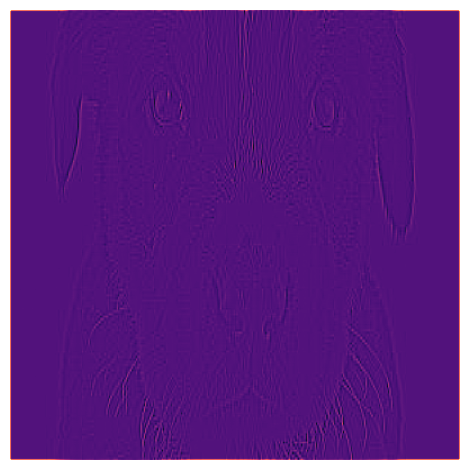

In [22]:
# Definition of convolution here
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input = image,
    filters = kernel,
    strides=1,
    padding='VALID',
)
plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

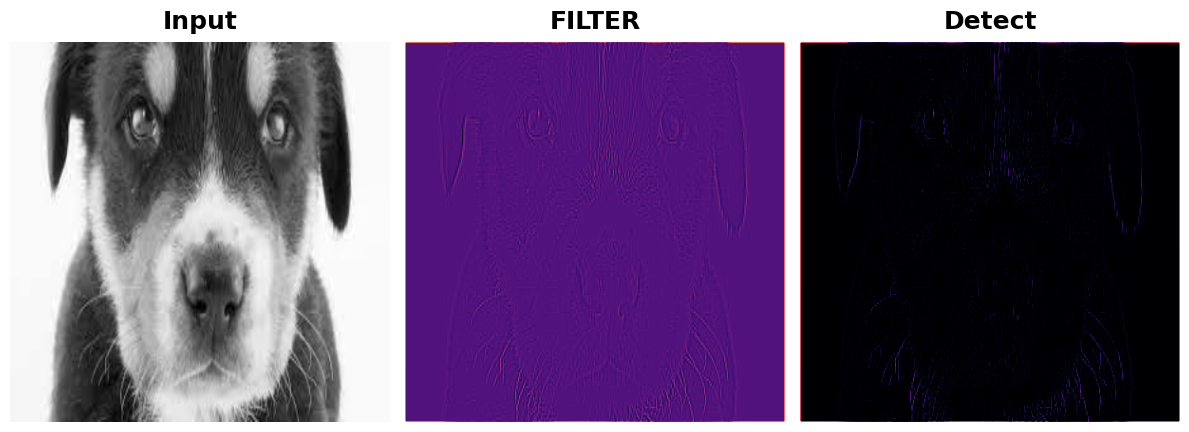

In [26]:
# Activiation function
relu = tf.nn.relu
image_relu = relu(image_filter)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(
    tf.squeeze(image) , cmap = 'gray'
)
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('FILTER')
plt.subplot(133)
plt.imshow(tf.squeeze(image_relu))
plt.axis('off')
plt.title('Detect')
plt.show()


In [28]:
# Pooling & stuff
image_focus = tf.nn.pool(
   input=image_relu,
    window_shape= (2,2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(tf.squeeze(image_relu))
plt.axis('off')
plt.title("ReLU Detection")
plt.subplot(122)
plt.imshow(tf.squeeze(image_focus))
plt.axis('off')
plt.title("Max Pool condensing")
plt.show()


ValueError: ignored

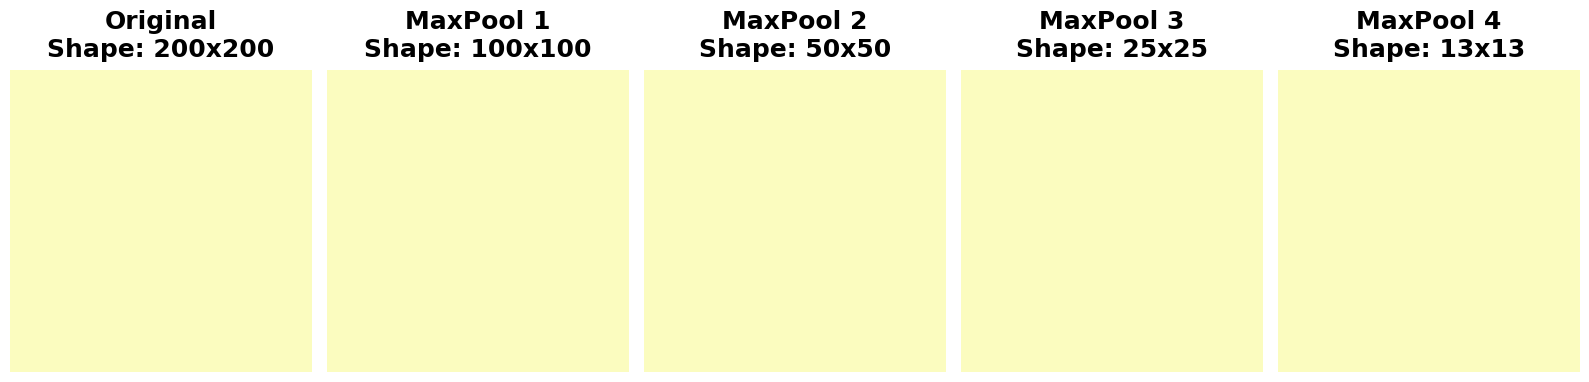

In [30]:
REPEATS = 4
SIZE = [64,64]

image = tf.expand_dims(image,axis=-1)
image = tf.squeeze(image)
plt.figure(figsize=(16,4))
plt.subplot(1,REPEATS+1,1)
plt.imshow(image,vmin=0,vmax=1)
plt.title("Original\nShape: {}x{}".format(image.shape[0], image.shape[1]))
plt.axis('off')

for i in range(REPEATS):
  ax = plt.subplot(1,REPEATS+1,i+2)
  image = tf.reshape(image,[1,*image.shape,1])
  image = tf.nn.pool(image,window_shape = (2,2),strides=(2, 2), padding='SAME', pooling_type='MAX')
  image = tf.squeeze(image)
  plt.imshow(image,vmin=0,vmax=1)
  plt.title("MaxPool {}\nShape: {}x{}".format(i+1,image.shape[0],image.shape[1]))
  plt.axis('off')